In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
#load the datasets

socioeconomic_df = pd.read_csv("./Data/socioeconomic_dataset.csv")
health_burden_df = pd.read_csv("./Data/health_burden_dataset.csv")
risk_factors_df = pd.read_csv("./Data/risk_factor_dataset.csv")

In [35]:
risk_factors_df.head()

,measure,location,cause,risk_factor,metric,year,val
0,Deaths,Morocco,Chronic obstructive pulmonary disease,Ambient ozone pollution,Number,2000,257.840865
1,Deaths,Morocco,Chronic obstructive pulmonary disease,Ambient ozone pollution,Number,2001,249.595886
2,Deaths,Morocco,Chronic obstructive pulmonary disease,Ambient ozone pollution,Number,2002,245.426604
3,Deaths,Morocco,Chronic obstructive pulmonary disease,Ambient ozone pollution,Number,2003,268.556783
4,Deaths,Morocco,Chronic obstructive pulmonary disease,Ambient ozone pollution,Number,2004,298.192621


In [36]:
# Standardize column names for consistency
socioeconomic_df.rename(columns={'Country': 'country', 'Year': 'year'}, inplace=True)
health_burden_df.rename(columns={'location': 'country'}, inplace=True)
risk_factors_df.rename(columns={'location': 'country'}, inplace=True)

In [9]:
# Step 2: Normalize text values for merging
socioeconomic_df['country'] = socioeconomic_df['country'].str.strip().str.lower()
health_burden_df['country'] = health_burden_df['country'].str.strip().str.lower()
risk_factors_df['country'] = risk_factors_df['country'].str.strip().str.lower()

In [37]:
# Step 3: Subset COPD-specific rows from burden and risk datasets
copd_burden_df = health_burden_df[
    health_burden_df['cause'].str.contains("chronic obstructive pulmonary disease", case=False)
].copy()

copd_risk_df = risk_factors_df[
    risk_factors_df['cause'].str.contains("chronic obstructive pulmonary disease", case=False)
].copy()


# copd_burden_df.to_csv("burden_risk.csv", index=False)

In [38]:
# Step 4: Pivot health burden data to wide format ---
burden_pivot = copd_burden_df.pivot_table(
    index=['country', 'year'],
    columns='measure',
    values='val',
    aggfunc='mean'
).reset_index()

# Fill NaN values with 0 and convert all numeric columns to integers
for col in burden_pivot.columns[2:]:  # Skip first three columns (country, year, measure)
    burden_pivot[col] = burden_pivot[col].fillna(0).astype(int)

# Rename risk_factor columns by flattening the MultiIndex (if any)
burden_pivot.columns.name = None  # Remove the column index name
burden_pivot = burden_pivot.rename(columns=lambda x: x.replace(" ", "_").lower() if isinstance(x, str) else x)

# Display the modified dataframe
print(burden_pivot.head())

# burden_pivot.to_csv("burden_risk.csv", index=False)

   country  year  dalys_(disability-adjusted_life_years)  deaths  incidence  \
0  Algeria  2000                                   76462    2493      28242   
1  Algeria  2001                                   78867    2558      29540   
2  Algeria  2002                                   82146    2656      31153   
3  Algeria  2003                                   85619    2775      32909   
4  Algeria  2004                                   89019    2884      34679   

   prevalence  ylds_(years_lived_with_disability)  ylls_(years_of_life_lost)  
0      408840                               25101                      51360  
1      426458                               26172                      52695  
2      447935                               27464                      54682  
3      471288                               28878                      56740  
4      494937                               30304                      58715  


In [46]:

# Pivot the dataset to align risk factors as columns
risk_pivot = copd_risk_df.pivot_table(
    index=['country', 'year', 'measure'],
    columns='risk_factor',
    values='val',
    aggfunc='mean'
).reset_index()

# Fill NaN values with 0 and convert all numeric columns to integers
for col in risk_pivot.columns[3:]:  # Skip first three columns (country, year, measure)
    risk_pivot[col] = risk_pivot[col].fillna(0).astype(int)

# Rename risk_factor columns by flattening the MultiIndex (if any)
risk_pivot.columns.name = None  # Remove the column index name
risk_pivot = risk_pivot.rename(columns=lambda x: x.replace(" ", "_").lower() if isinstance(x, str) else x)

# Pivoting the 'measure' column to create separate columns for each measure
df_risk_wide = risk_pivot.pivot(index=["country", "year"], columns="measure")

# Flattening multi-level column names
df_risk_wide.columns = ['_'.join(col).strip() for col in df_risk_wide.columns.values]

# Resetting index to make 'country' and 'year' regular columns again
df_risk_wide.reset_index(inplace=True)

# Dictionary for renaming columns concisely
rename_dict = {
    "ambient_ozone_pollution_DALYs (Disability-Adjusted Life Years)": "ozone_DALY",
    "ambient_ozone_pollution_Deaths": "ozone_DTH",
    "ambient_ozone_pollution_YLDs (Years Lived with Disability)": "ozone_YLD",
    "ambient_ozone_pollution_YLLs (Years of Life Lost)": "ozone_YLL",
    "ambient_particulate_matter_pollution_DALYs (Disability-Adjusted Life Years)": "pm25_DALY",
    "ambient_particulate_matter_pollution_Deaths": "pm25_DTH",
    "ambient_particulate_matter_pollution_YLDs (Years Lived with Disability)": "pm25_YLD",
    "ambient_particulate_matter_pollution_YLLs (Years of Life Lost)": "pm25_YLL",
    "household_air_pollution_from_solid_fuels_DALYs (Disability-Adjusted Life Years)": "household_pollution_DALY",
    "household_air_pollution_from_solid_fuels_Deaths": "household_pollution_DTH",
    "household_air_pollution_from_solid_fuels_YLDs (Years Lived with Disability)": "household_pollution_YLD",
    "household_air_pollution_from_solid_fuels_YLLs (Years of Life Lost)": "household_pollution_YLL",
    "secondhand_smoke_DALYs (Disability-Adjusted Life Years)": "shs_DALY",
    "secondhand_smoke_Deaths": "shs_DTH",
    "secondhand_smoke_YLDs (Years Lived with Disability)": "shs_YLD",
    "secondhand_smoke_YLLs (Years of Life Lost)": "shs_YLL",
    "smoking_DALYs (Disability-Adjusted Life Years)": "smoking_DALY",
    "smoking_Deaths": "smoking_DTH",
    "smoking_YLDs (Years Lived with Disability)": "smoking_YLD",
    "smoking_YLLs (Years of Life Lost)": "smoking_YLL"
}

# Renaming columns
df_risk_wide.rename(columns=rename_dict, inplace=True)


df_risk_wide

# risk_pivot.to_csv("risk_pivot.csv", index=False)

,country,year,ozone_DALY,ozone_DTH,ozone_YLD,ozone_YLL,pm25_DALY,pm25_DTH,pm25_YLD,pm25_YLL,...,household_pollution_YLD,household_pollution_YLL,shs_DALY,shs_DTH,shs_YLD,shs_YLL,smoking_DALY,smoking_DTH,smoking_YLD,smoking_YLL
0,Algeria,2000,7397,370,0,7397,18436,626,5923,12513,...,231,465,6768,214,2291,4477,26109,1003,7020,19088
1,Algeria,2001,7436,372,0,7436,18957,640,6159,12797,...,215,424,6985,220,2385,4600,26770,1020,7323,19447
2,Algeria,2002,7089,354,0,7089,19589,659,6419,13170,...,195,382,7288,228,2507,4781,27734,1052,7672,20062
3,Algeria,2003,7197,362,0,7197,20220,681,6686,13534,...,174,336,7612,239,2638,4973,28835,1086,8056,20779
4,Algeria,2004,7528,380,0,7528,20763,698,6935,13827,...,153,290,7934,249,2774,5159,29823,1120,8426,21397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183,Zimbabwe,2017,2144,97,0,2144,3206,107,812,2393,...,6636,18292,2530,74,766,1764,13501,491,2777,10724
1184,Zimbabwe,2018,2161,97,0,2161,3147,105,805,2341,...,6875,18715,2603,76,794,1808,13824,499,2870,10954
1185,Zimbabwe,2019,2255,101,0,2255,3153,104,816,2337,...,7108,19061,2670,77,824,1846,14113,507,2963,11150
1186,Zimbabwe,2020,2338,105,0,2338,3370,111,881,2488,...,7204,18998,2713,78,847,1866,14225,507,3020,11205


In [48]:
# Step 6: Merge all datasets on 'country' and 'year' 
merged_df = socioeconomic_df.merge(burden_pivot, on=['country', 'year'], how='left')
merged_df = merged_df.merge(df_risk_wide, on=['country', 'year'], how='left')

# Preview the final merged dataset
print("Merged DataFrame shape:", merged_df.shape)
print(merged_df.head())

merged_df
merged_df.to_csv("merged_burden_risk.csv", index=False)

Merged DataFrame shape: (1040, 43)
   country       Sub-Region  year  Population  GDP PER CAPITA (USD)  \
0  Algeria  Northern Africa  2000    30774621               1780.38   
1  Algeria  Northern Africa  2001    31200985               1754.58   
2  Algeria  Northern Africa  2002    31624696               1794.81   
3  Algeria  Northern Africa  2003    32055883               2117.05   
4  Algeria  Northern Africa  2004    32510186               2624.80   

   Area (Km2)  Population Density  Total CO2 Emission excluding LUCF (Mt)  \
0     2381741           12.921061                                   80.05   
1     2381741           13.100075                                   78.65   
2     2381741           13.277974                                   82.40   
3     2381741           13.459013                                   88.19   
4     2381741           13.649757                                   89.49   

   Nitrogen Oxide  Sulphur Dioxide  ...  household_pollution_YLD  \
0      

In [13]:
# Ensure proper year formatting
merged_df['year'] = merged_df['year'].astype(int)

# Create DALYs Metric
merged_df['DALYs'] = merged_df[['Deaths', 'YLLs (Years of Life Lost)', 'YLDs (Years Lived with Disability)']].sum(axis=1)

merged_df.head()

,country,Sub-Region,year,Population,GDP PER CAPITA (USD),Area (Km2),Population Density,Total CO2 Emission excluding LUCF (Mt),Nitrogen Oxide,Sulphur Dioxide,...,Incidence,Prevalence,YLDs (Years Lived with Disability),YLLs (Years of Life Lost),Ambient ozone pollution,Ambient particulate matter pollution,Household air pollution from solid fuels,Secondhand smoke,Smoking,DALYs
0,algeria,Northern Africa,2000,30774621,1780.38,2381741,12.921061,80.05,242832.24,89269.27,...,28242.647531,408840.830313,25101.743830,51360.935434,5054.980944,9375.097693,354.386610,3437.971977,13305.271759,78956.308305
1,algeria,Northern Africa,2001,31200985,1754.58,2381741,13.100075,78.65,246238.80,83231.85,...,29540.993463,426458.817482,26172.587156,52695.269981,5081.895308,9638.739979,325.150285,3547.952804,13640.704588,81426.606993
2,algeria,Northern Africa,2002,31624696,1794.81,2381741,13.277974,82.40,271977.39,108062.85,...,31153.212398,447935.566209,27464.657091,54682.299394,4844.384940,9959.869207,293.801265,3701.332607,14130.376786,84803.350599
3,algeria,Northern Africa,2003,32055883,2117.05,2381741,13.459013,88.19,276968.15,99115.59,...,32909.566644,471288.546293,28878.681108,56740.531108,4919.215499,10280.677842,259.948892,3866.094336,14689.413591,88395.030373
4,algeria,Northern Africa,2004,32510186,2624.80,2381741,13.649757,89.49,290319.45,105658.06,...,34679.926076,494937.364024,30304.611356,58715.119957,5145.654330,10556.059161,225.717856,4029.419293,15191.876843,91903.762506


In [49]:

#Missing Data Summary
# ----------------------------
missing_data_pct = (merged_df.isna().mean() * 100).sort_values(ascending=False)

print(missing_data_pct)

HAQ_Index                                 95.288462
Chronic_Respiratory(RSD)                  95.288462
ozone_YLD                                  5.769231
incidence                                  5.769231
prevalence                                 5.769231
ylds_(years_lived_with_disability)         5.769231
ylls_(years_of_life_lost)                  5.769231
dalys_(disability-adjusted_life_years)     5.769231
deaths                                     5.769231
ozone_DTH                                  5.769231
ozone_DALY                                 5.769231
shs_DALY                                   5.769231
shs_DTH                                    5.769231
shs_YLD                                    5.769231
shs_YLL                                    5.769231
household_pollution_DALY                   5.769231
household_pollution_DTH                    5.769231
household_pollution_YLD                    5.769231
household_pollution_YLL                    5.769231
smoking_DALY

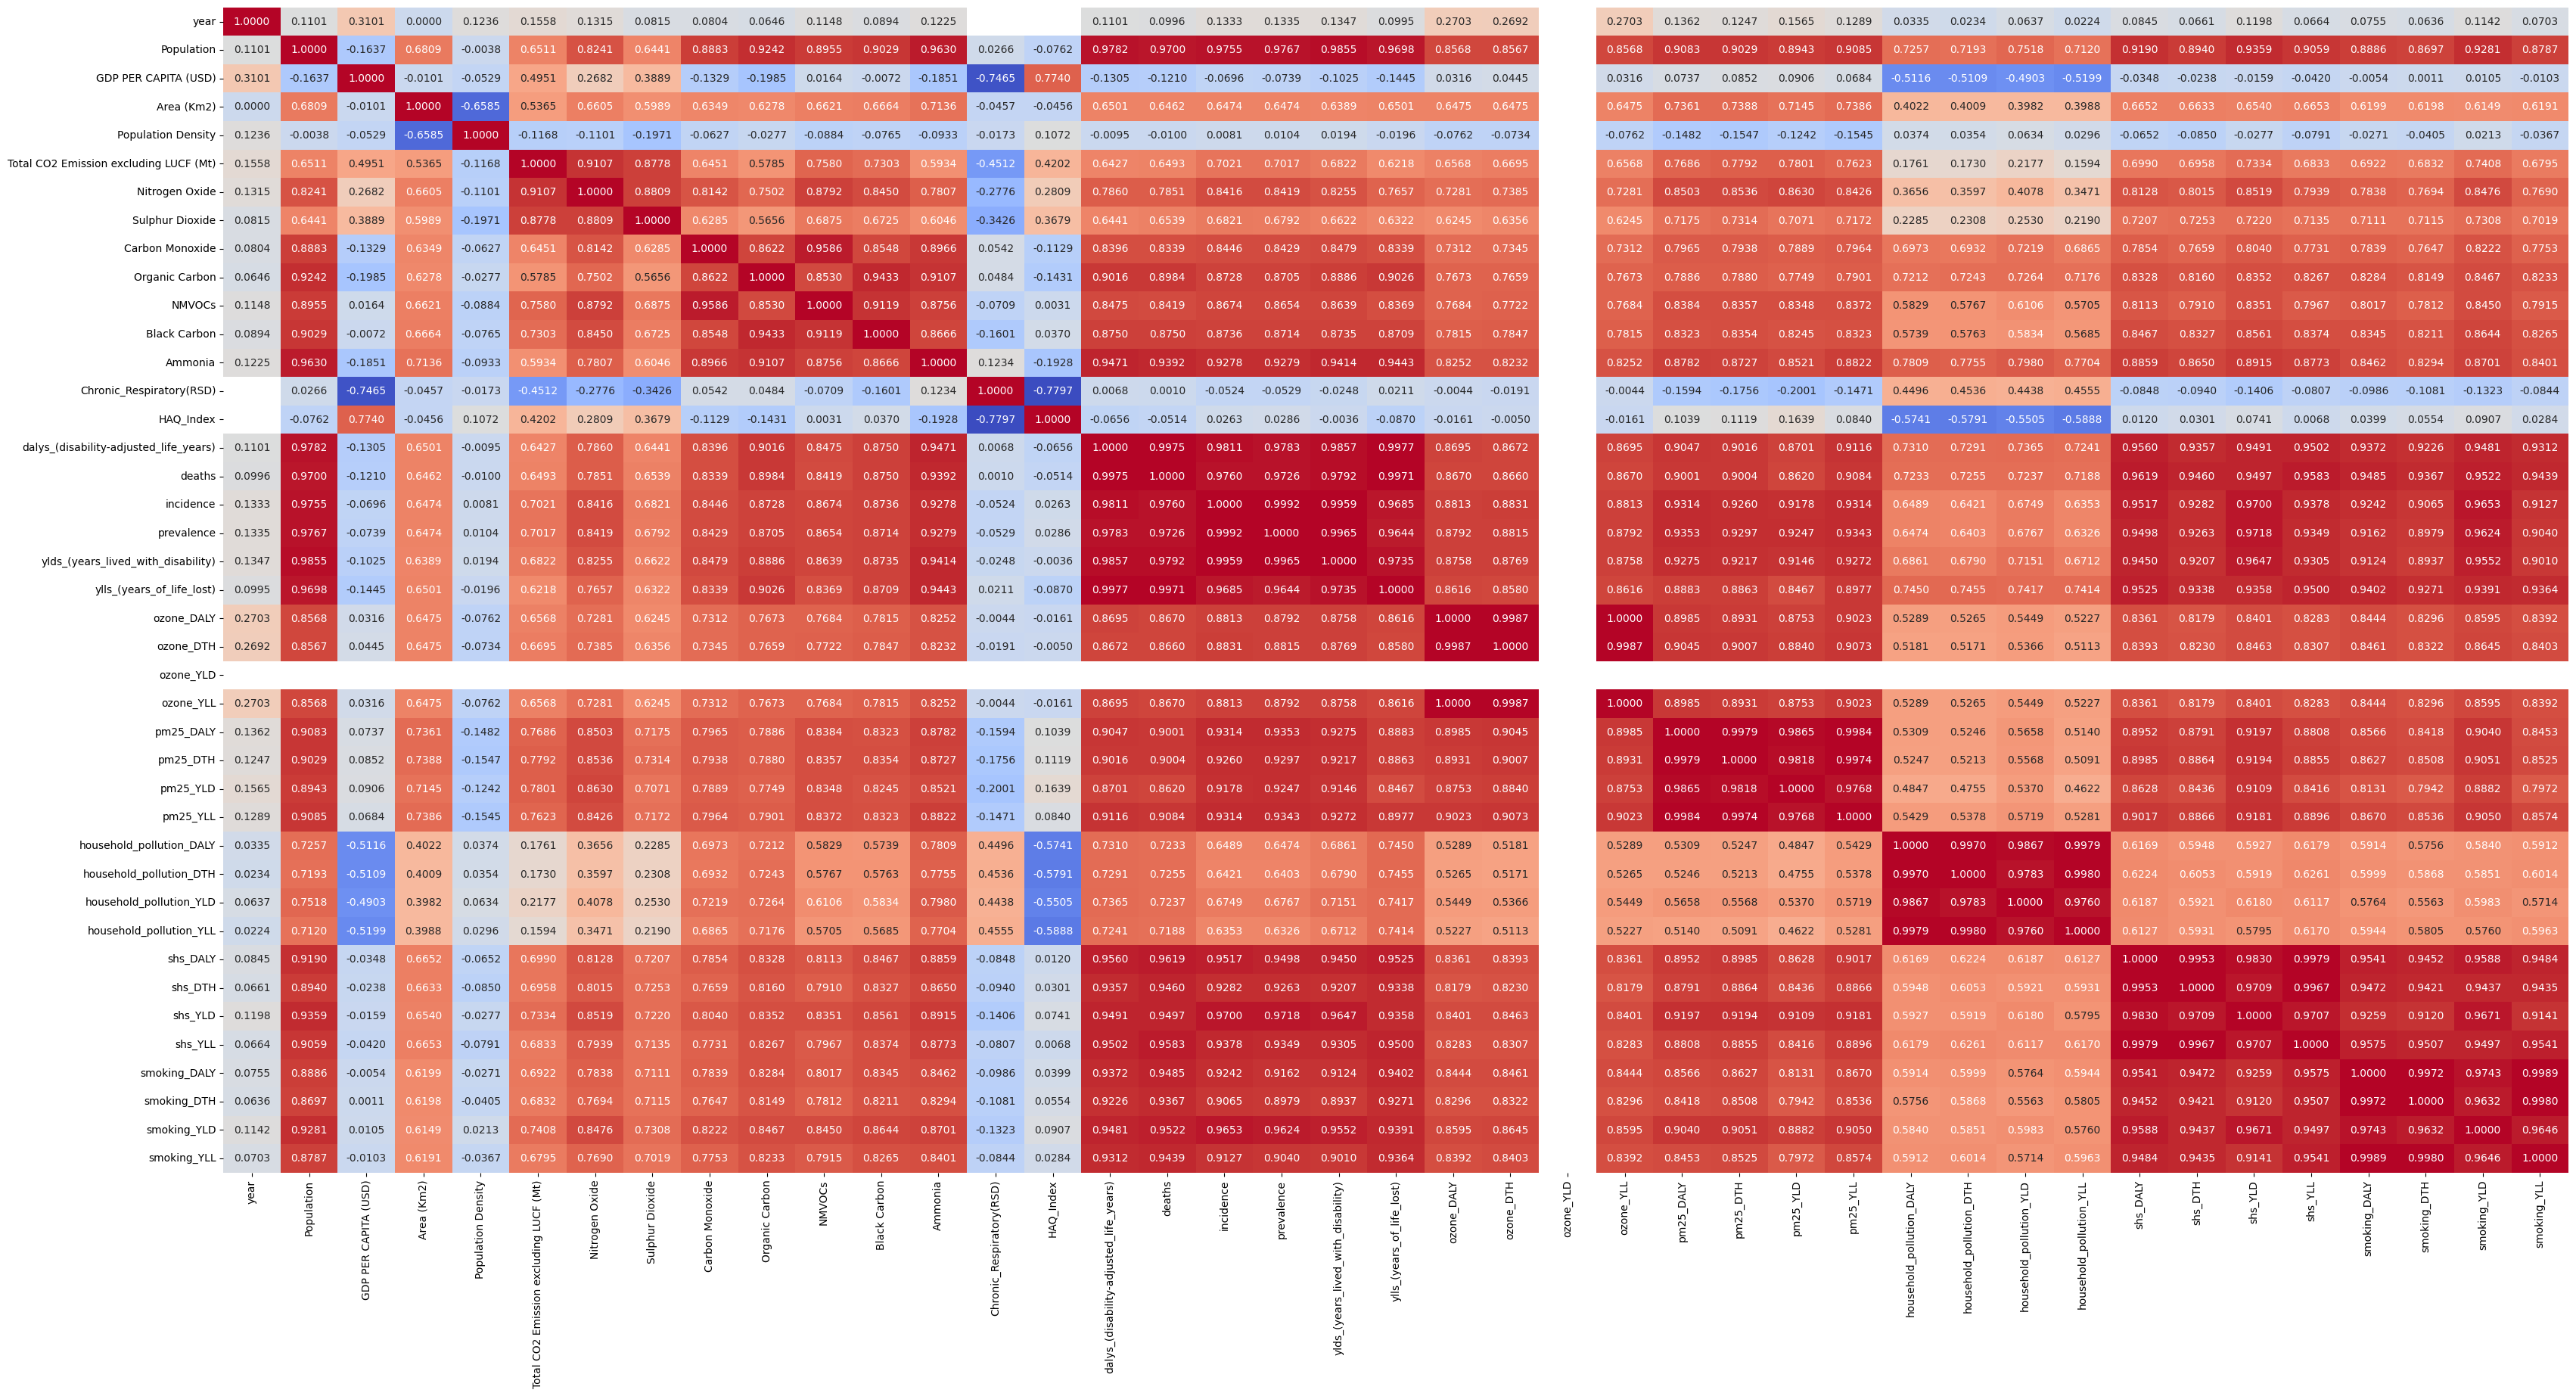

In [51]:
# Correlation Matrix
eda_numeric = merged_df.select_dtypes(include=['float64', 'int64'])
eda_corr = eda_numeric.corr(method='spearman')

# Plot heatmap
fig, ax = plt.subplots(figsize=(40, 20))
sns.heatmap(eda_corr, annot=True, fmt='.4f', 
            cmap='coolwarm', cbar=False, ax=ax)

# Adjust y-axis labels
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# Save figure
#plt.savefig('result.png', bbox_inches='tight', pad_inches=0.0)
plt.show()

## **Analysis of the Correlation Heatmap**

### **1. Strong Positive Correlations**
- **Health Impact Metrics:**  
  Variables like **DALYs (Disability-Adjusted Life Years), YLLs (Years of Life Lost), YLDs (Years Lived with Disability), Incidence, Prevalence, and Deaths** are highly correlated (values close to 1). This suggests that these health burden metrics tend to increase together.
- **Air Pollutants:**  
  Strong correlations exist between pollutants like **Carbon Monoxide, Black Carbon, Ammonia, Organic Carbon, and Sulphur Dioxide**, indicating they often coexist in similar environmental conditions.

### **2. Strong Negative Correlations**
- **GDP Per Capita vs. Health Burden:**  
  **GDP per capita** shows a negative correlation with health burden indicators (**DALYs, Deaths, Incidence, and YLLs**). This suggests that wealthier regions tend to experience lower disease burden.
- **GDP Per Capita vs. Pollution:**  
  There are weak to moderate negative correlations between **GDP per capita and various air pollutants**, indicating that economically developed areas may have better environmental controls.

### **3. Population Density and Pollution**
- Population density appears to be **moderately correlated** with pollutants like **Nitrogen Oxide, Carbon Monoxide, and Black Carbon**, suggesting that urban areas with higher populations may have higher pollution levels.

### **4. Respiratory Disease and Air Pollution**
- **Chronic Respiratory Diseases (RSD) have moderate to strong correlations with pollutants** like **Sulphur Dioxide, Nitrogen Oxide, and Black Carbon**, suggesting that exposure to these pollutants may be linked to respiratory illnesses.

### **5. Outliers and Unexpected Correlations**
- **Household air pollution from solid fuels has a weaker correlation with outdoor air pollutants** than expected, which might indicate differences in sources of pollution (indoor vs. outdoor).
- **Smoking and secondhand smoke do not exhibit the strongest correlations with respiratory diseases, which could be due to other confounding factors.**

### **Conclusion**
The heatmap suggests significant relationships between air pollution and health outcomes, highlighting the potential impact of environmental factors on public health. It also indicates economic disparities in health outcomes, as seen in the negative correlation between GDP per capita and disease burden.

In [55]:
#COPD Burden by Sub-Region
regional_burden = merged_df.groupby('Sub-Region')[
    ['deaths', 'ylls_(years_of_life_lost)', 'ylds_(years_lived_with_disability)']
].mean().sort_values(by='deaths', ascending=False)

regional_burden

,deaths,ylls_(years_of_life_lost),ylds_(years_lived_with_disability)
Sub-Region,,,
Northern Africa,3854.408333,83401.816667,29877.708333
Southern Africa,2815.980000,59564.720000,17966.750000
Eastern Africa,1687.841176,38645.267647,11643.167647
Western Africa,1591.621429,34925.782143,15869.728571
Middle Africa,828.735714,19869.442857,5990.457143


In [26]:
# Top Countries by COPD Burden
top_countries_copd = merged_df.groupby('country')[
    ['Deaths', 'YLLs (Years of Life Lost)', 'Smoking', 'Ambient particulate matter pollution']
].mean().sort_values(by='Deaths', ascending=False).head(10)

top_countries_copd

,Deaths,YLLs (Years of Life Lost),Smoking,Ambient particulate matter pollution
country,,,,
south africa,12278.506360,256776.501823,51874.195684,33241.802138
nigeria,11031.339674,231243.227133,13088.903210,38452.224498
egypt,9127.895670,213128.791406,52850.785411,67586.051818
ethiopia,7295.761152,162517.577787,9379.133118,6878.469517
morocco,4668.978608,95103.757284,14867.924892,14335.454144
kenya,4325.675454,95864.485283,11210.516846,4778.786523
algeria,3607.104373,69847.128432,17924.407552,12240.516191
sudan,3591.613384,81099.614955,14645.169880,12157.543378
madagascar,2995.295955,71261.539183,5187.886958,1448.448331
